In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('./Customers.csv')  # Replace with actual file path
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values if any (you can adjust this part as needed)
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)


# Select relevant features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']  # Adjust features as per dataset
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


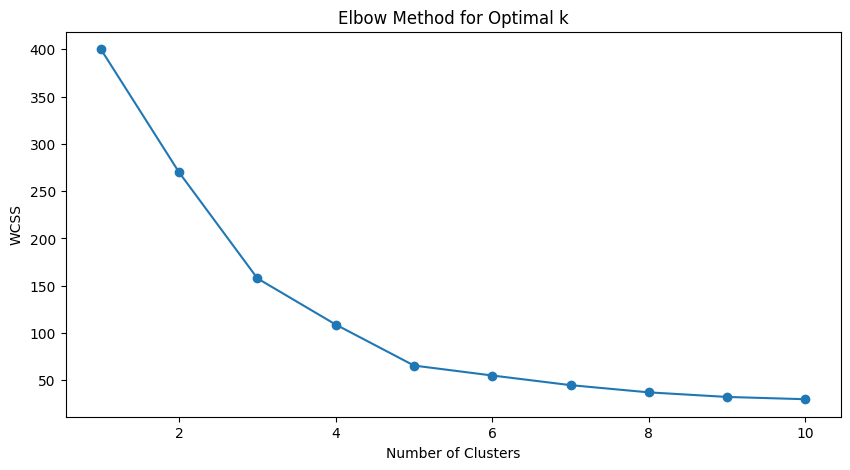

In [17]:
# Use Elbow method to determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [18]:
# Fit K-means with optimal number of clusters (use k from elbow method, e.g., k=5)
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster labels
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [19]:
# Calculate silhouette score to evaluate clustering
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print("Silhouette Score: ", silhouette_avg)


Silhouette Score:  0.5546571631111091


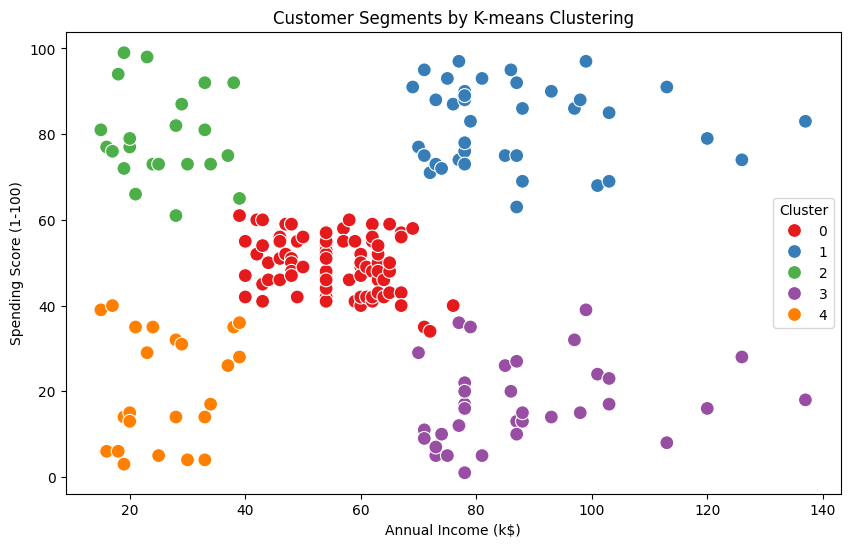

In [20]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments by K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
